In [1]:
!conda install -c conda-forge scikit-rf --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [52]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf
from scipy.optimize import *
import pandas as pd
import cmath as cm

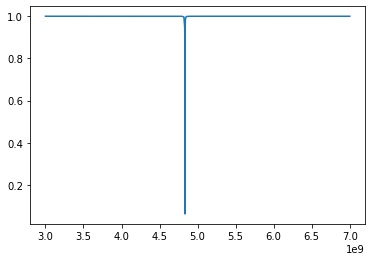

In [53]:
# Read File
#ntwk = rf.Network('Resonators_Unit_v1.1_1.s2p')
#ntwk.plot_s_smith()
cols_list = ["Frequency (Ghz)", "MAG[S21]", "ANG[S21]"]
nt=pd.read_csv("Resonators_Unit_v1.csv", usecols=cols_list)
freq_given=1e9*nt["Frequency (Ghz)"]
s21_given=nt["MAG[S21]"]
plt.plot(freq_given,s21_given)

In [123]:
# Fit Routine 

def f(x,f0,A0,Q) :                                                                      #S21 mod fit function definition and parameters
    return np.abs(1-A0/(1+2*Q*1j*(x-f0)/f0))                                             #Lorentzian fit,f0, amp 0 and Q.

def ph(x,f0,A0,Q,) :                                                                      #S21 mod fit function definition and parameters
    return 180*np.angle(1-b/(1+2*c*1j*(x-a)/a))/np.pi+2*ph0*x*180                      #Lorentzian fit,f0, amp 0 and Q.+ phase of

# Given Data test
#freq_given=np.linspace(0,10e9,100000)                                                 # frequency vector  
#s21_given=f(freq_given,5e9,1,150) + 0.01*np.random.normal(size=len(freq_given))    # data vector with noise

# Given real data
cols_list = ["Frequency (Ghz)", "MAG[S21]", "ANG[S21]"]
nt=pd.read_csv("Resonators_Unit_v1.csv", usecols=cols_list)
freq_given=1e9*nt["Frequency (Ghz)"]
s21_mag_given=nt["MAG[S21]"]
s21_ang_given=nt["ANG[S21]"]

# Fit Data
params, extras= curve_fit(f, freq_given, s21_mag_given, bounds=([3e9, 0 , 10],[6e9,1,10000]))  # fitting function with boundaries

print("a=%7.3e, b=%7.3e, c=%7.3e" %(params[0], params[1], params[2]))

def ph(x,ph0) :                                                                      #S21 mod fit function definition and parameters
    return 180*np.angle(1-params[1]/(1+2*params[2]*1j*(x-params[0])/params[0]))/np.pi+2*ph0*x*180                      #Lorentzian fit,f0, amp 0 and Q.+ phase of


params1, extras= curve_fit(ph, freq_given, s21_ang_given, bounds=([-180],[180]))  # fitting function with boundaries

#print Params
print("ph0=%7.3e" %(params1[0]))


a=4.834e+09, b=9.012e-01, c=2.051e+03
ph0=-1.564e-11


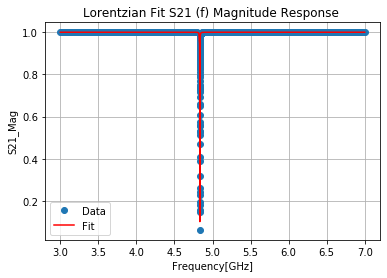

In [121]:
#Ploting MAg s21 Fit

fig, ax = plt.subplots()
ax.plot(freq_given/1e9,s21_mag_given,'o',freq_given/1e9,f(freq_given,params[0],params[1],params[2]),'r')

ax.set(xlabel='Frequency[GHz]', ylabel='S21_Mag',
       title='Lorentzian Fit S21 (f) Magnitude Response ')
ax.grid()

ax.legend(['Data', 'Fit'], loc='best')

fig.savefig("Mag_Fit_Resonator_Q.pdf")
plt.show()

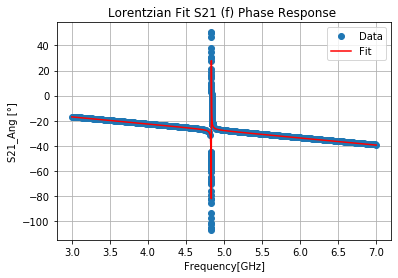

In [122]:
#Ploting MAg s21 Fit

fig, ax = plt.subplots()
ax.plot(freq_given/1e9,s21_ang_given,'o',freq_given/1e9,ph(freq_given,params1[0]),'r')

ax.set(xlabel='Frequency[GHz]', ylabel='S21_Ang [°]',
       title='Lorentzian Fit S21 (f) Phase Response ')
ax.grid()

ax.legend(['Data', 'Fit'], loc='best')

fig.savefig("Phase_Fit_Resonator_Q.pdf")
plt.show()

f0=4.827e+09, A0=6.855e-01, Q=2.581e+02, ph0=5.364e-02


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:476: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/optimize/_lsq/trf.py:299: ComplexWarning: Casting complex values to real discards the imaginary part
  f_augmented[:m] = f
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/optimize/_lsq/trf.py:303: ComplexWarning: Casting complex values to real discards the imaginary part
  J_augmented[m:] = np.diag(diag_h**0.5)


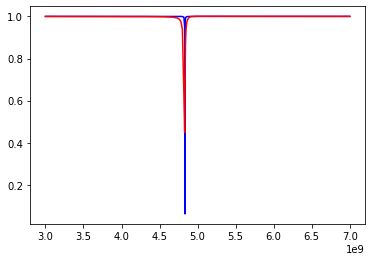

In [101]:
# Fit Routine 

def f(x,f0,A0,Q,ph0) :                                                                      #S21 mod fit function definition and parameters
    return 1-A0*np.exp(-1j*ph0)/(1+2*Q*1j*(x-f0)/f0)                                 #Lorentzian fit,f0, amp 0 , Q and phase.

# Given Data test
#freq_given=np.linspace(0,10e9,100000)                                                 # frequency vector  
#s21_given=f(freq_given,5e9,1,150) + 0.01*np.random.normal(size=len(freq_given))    # data vector with noise

# Given real data
cols_list = ["Frequency (Ghz)", "MAG[S21]", "ANG[S21]"]
nt=pd.read_csv("Resonators_Unit_v1.csv", usecols=cols_list)
freq_given=1e9*nt["Frequency (Ghz)"]
s21_mag_given=nt["MAG[S21]"]
s21_ang_given=np.pi*nt["ANG[S21]"]/180
s21_given=s21_mag_given*(np.cos(s21_ang_given) - np.sin(s21_ang_given)*1j)

# Fit Data
params, extras= curve_fit(f, freq_given, s21_given, bounds=([3e9, 0 , 10, -np.pi],[6e9,1,10000, np.pi]))  # fitting function with boundaries

#print Params
print("f0=%7.3e, A0=%7.3e, Q=%7.3e, ph0=%7.3e" %(params[0], params[1], params[2], params[3]))

#plot fuctions and fits
plt.plot(freq_given,abs(s21_given),'b')
plt.plot(freq_given,abs(f(freq_given,params[0],params[1],params[2],params[3])),'r')

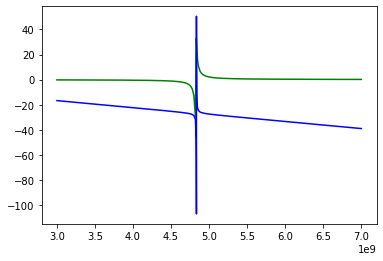

In [98]:
#plot angle fit
#freq_red=np.linspace(params[0]-10*params[0]/params[2],params[0]+10*params[0]/params[2],10000) 
plt.plot(freq_given,180*np.angle(f(freq_given,params[0],params[1],params[2],params[3]))/np.pi,'g')
plt.plot(freq_given,180*s21_ang_given/np.pi,'b')